<b>ΕΡΓΑΣΙΑ 2 - ΤΕΧΝΙΚΕΣ ΕΞΟΡΥΞΗΣ ΔΕΔΟΜΕΝΩΝ <br />
ΟΜΑΔΑ:<br />
ΕΥΑΓΓΕΛΟΣ ΦΑΚΟΡΕΛΛΗΣ: 1115201900203<br />
ΧΡΗΣΤΟΣ ΓΕΩΡΓΙΟΣ ΦΟΥΚΑΝΕΛΗΣ: 1115201900204</b><br />

PYTHON LIBRARIES - IMPORTS

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


ΜΕΡΟΣ 1 - ΑΝΑΛΥΣΗ ΚΑΙ ΚΑΘΑΡΙΣΜΑ ΤΩΝ ΔΕΔΟΜΕΝΩΝ
Σημείωση: Τα train.csv και test.csv κατά την υλοποίηση της εργασίας, είχαμε τοποθετήσει τα δεδομένα σε έναν φάκελο datas, οπότε προκειμένου να γίνουν import σωστά θα πρέπει να δημιουργηθεί ο φάκελος αυτός και να τοποθετηθούν μέσα τα csv αρχεία

In [47]:
train_data = pd.read_csv('datas/train.csv')
test_data = pd.read_csv('datas/test.csv')
target_data = pd.read_csv('datas/target.csv')

train_data = train_data.head(5000)
test_data = test_data.head(5000)
target_data = target_data.head(5000)

1ο Υποερώτημα - Συνοπτική εικόνα των δεδομένων και αφαίρεση outliers

In [23]:
train_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.530000,1.650600,-73.973465,40.750627,-73.974282,40.751872,960.083200
std,0.499149,1.297095,0.038965,0.027792,0.035727,0.032324,3355.401654
min,1.000000,1.000000,-74.177322,40.637192,-74.359192,40.560123,3.000000
25%,1.000000,1.000000,-73.992119,40.736941,-73.991564,40.735152,396.750000
50%,2.000000,1.000000,-73.981953,40.753222,-73.980431,40.753733,664.000000
75%,2.000000,2.000000,-73.967909,40.767767,-73.963884,40.769684,1069.250000
max,2.000000,6.000000,-73.588509,41.033234,-73.588501,41.033234,86219.000000


Αφαίρεση των outliers, με βάση την στήλη trip_duration

In [24]:
train_data = train_data[train_data['trip_duration'].map(lambda x: ( x-train_data['trip_duration'].mean() ).__abs__() < (2*train_data['trip_duration'].std()) )]

2ο Υποερώτημα - Φιλτράρισμα Συντεταγμένων εντός Νέας Υόρκης

In [25]:
train_data.drop(train_data[(train_data['dropoff_longitude'] <= -74.03) | (train_data['dropoff_longitude'] >= -73.75)].index, inplace = True)
train_data.drop(train_data[(train_data['dropoff_latitude'] <= 40.63) | (train_data['dropoff_latitude'] >= 40.85)].index, inplace = True)

train_data.drop(train_data[(train_data['pickup_longitude'] <= -74.03) | (train_data['pickup_longitude'] >= -73.75)].index, inplace = True)
train_data.drop(train_data[(train_data['pickup_latitude'] <= 40.63) | (train_data['pickup_latitude'] >= 40.85)].index, inplace = True)

3ο Υποερώτημα - Αλλαγή Μορφοποίησης Μεταβλητών σε Datetime

In [26]:
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
train_data['dropoff_datetime'] = pd.to_datetime(train_data['dropoff_datetime'])
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])

Χρησιμοποιώντας το μετασχηματισμένο πεδίο datetime:

Ορίζουμε δύο βοηθητικές συναρτήσεις οι οποίες "παράγουν" περιόδους ημέρας και εποχές του χρόνου

In [27]:
def period_generator(x):
    x = x.hour
    if (x >= 6) and (x < 12):
        return 'Morning'
    elif (x >= 12) and (x < 16 ):
        return 'Afternoon'
    elif (x >= 16) and (x < 22):
        return 'Evening'
    elif (x >= 22) or (x < 6) :
        return 'Late Night'

def season_generator(x):

    # get the current day of the year
    x = x.timetuple().tm_yday

    # "day of year" ranges for the northern hemisphere
    spring = range(80, 172)
    summer = range(172, 264)
    fall = range(264, 355)
    # winter = everything else

    if x in spring:
        season = 'spring'
    elif x in summer:
        season = 'summer'
    elif x in fall:
        season = 'fall'
    else:
        season = 'winter'
    return season

In [28]:
train_data['day_period_pickup'] = train_data['pickup_datetime'].apply(period_generator)
train_data['day_period_dropoff'] = train_data['dropoff_datetime'].apply(period_generator)
train_data['day_name_pickup'] = train_data['pickup_datetime'].dt.day_name()
train_data['day_name_dropoff'] = train_data['dropoff_datetime'].dt.day_name()
train_data['month_pickup'] = train_data['pickup_datetime'].dt.month_name()
train_data['month_dropoff'] = train_data['dropoff_datetime'].dt.month_name()
train_data['hour_pickup'] = train_data['pickup_datetime'].dt.hour
train_data['hour_dropoff'] = train_data['dropoff_datetime'].dt.hour
train_data['year_pickup'] = train_data['pickup_datetime'].dt.year
train_data['year_dropoff'] = train_data['dropoff_datetime'].dt.year
train_data['season_pickup'] = train_data['pickup_datetime'].apply(season_generator)
train_data['season_dropoff'] = train_data['dropoff_datetime'].apply(season_generator)

test_data['day_period_pickup'] = test_data['pickup_datetime'].apply(period_generator)
test_data['day_name_pickup'] = test_data['pickup_datetime'].dt.day_name()
test_data['month_pickup'] = test_data['pickup_datetime'].dt.month_name()
test_data['hour_pickup'] = test_data['pickup_datetime'].dt.hour
test_data['year_pickup'] = test_data['pickup_datetime'].dt.year
test_data['season_pickup'] = test_data['pickup_datetime'].apply(season_generator)

Ακολουθούν τα Σχετικά Διαγράμματα:

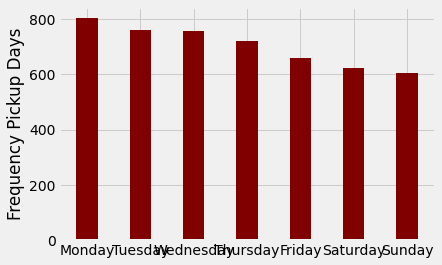

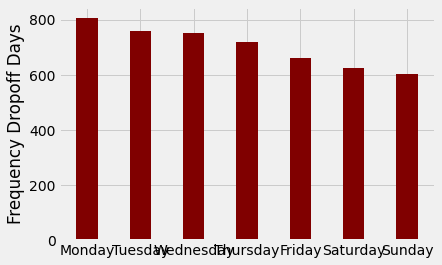

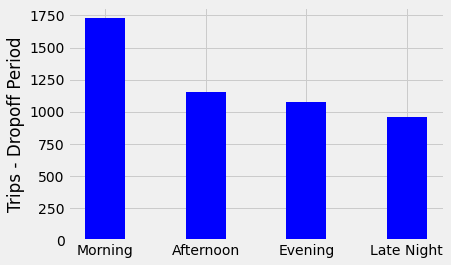

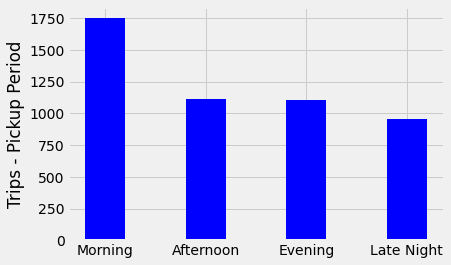

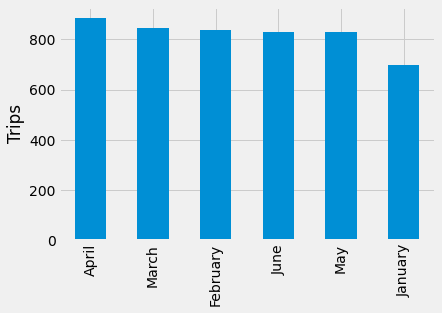

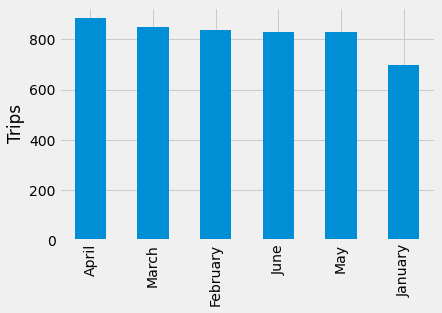

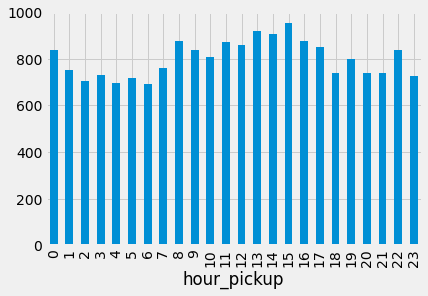

In [29]:
# list of days
days_lists = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Plots of Frequency per pickup days and dropoff days

plt.bar(days_lists, train_data['day_name_pickup'].value_counts(), color ='maroon',
        width = 0.4)
plt.ylabel("Frequency Pickup Days")
plt.show()

plt.bar(days_lists, train_data['day_name_dropoff'].value_counts(), color ='maroon',
        width = 0.4)
plt.ylabel("Frequency Dropoff Days")
plt.show()

# list of available periods
periods_lists = ['Morning', 'Afternoon', 'Evening', 'Late Night']

# Plots of Trips per pickup day period and dropoff day period
plt.bar(periods_lists, train_data['day_period_pickup'].value_counts(), color ='blue',
        width = 0.4)
plt.ylabel("Trips - Dropoff Period")
plt.show()

plt.bar(periods_lists, train_data['day_period_dropoff'].value_counts(), color ='blue',
        width = 0.4)
plt.ylabel("Trips - Pickup Period")
plt.show()

# Plots of Trips per pickup months and dropoff months
fig, ax = plt.subplots()
train_data['month_pickup'].value_counts().plot(ax=ax, kind='bar')
plt.ylabel("Trips")
plt.show()

fig, ax = plt.subplots()
train_data['month_dropoff'].value_counts().plot(ax=ax, kind='bar')
plt.ylabel("Trips")
plt.show()

# trip duration per hours plot
train_data.groupby(['hour_pickup'])['trip_duration'].mean().plot(kind='bar')
plt.show()

<b>Συμπεράσματα - Παρατηρήσεις: </b><br />
Παρατηρούμε ότι η ημέρα με την μεγαλύτερη κινητικότητα είναι η Δευτέρα, και συγκεκριμένα τα πρωινά δηλαδή οι ώρες μεταξύ 6 και 12 το πρωί. Επίσης, η μεγαλύτερη συμφόρηση παρατηρείται τον Απρίλιο.

4ο Υποερώτημα - Ιστόγραμματα για trip duration και log transformation - trip duration

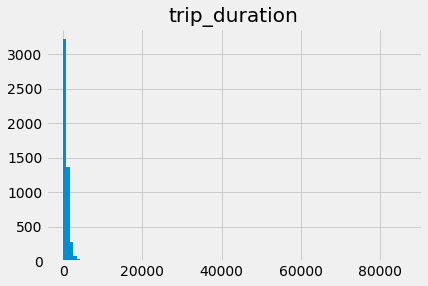

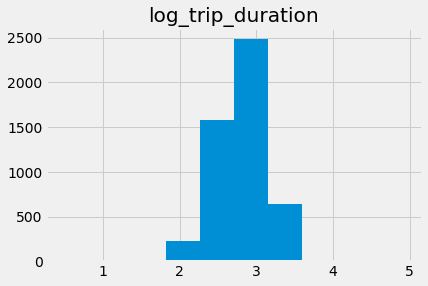

In [48]:
train_data.hist(column='trip_duration',bins=100)
plt.show()

train_data['log_trip_duration'] = np.log10(train_data['trip_duration'])
test_data['log_trip_duration'] = np.log10(train_data['trip_duration'])
target_data['log_trip_duration'] = np.log10(target_data['trip_duration'])

train_data.hist(column='log_trip_duration')
plt.show()

5ο Υποερώτημα - Μέση Διάρκεια Ταξιδιού Για τους Διαθέσιμους Παρόχους

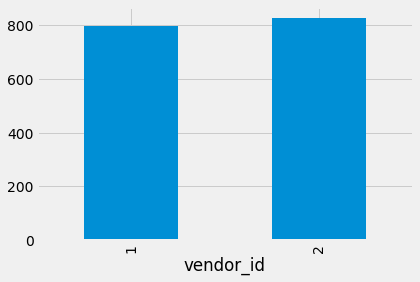

In [31]:
train_data.groupby(['vendor_id'])['trip_duration'].mean().plot(kind='bar')
plt.show()

6ο Υποερώτημα - Αντίκτυπος του αριθμού των επιβατών ανά ταξίδι στον χρόνο του ταξιδιού

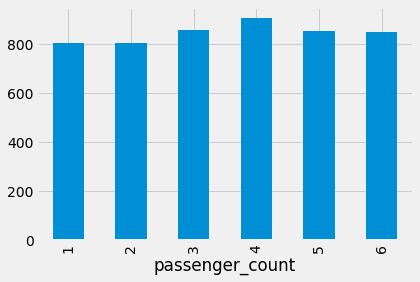

In [32]:
train_data.groupby(['passenger_count'])['trip_duration'].mean().plot(kind='bar')
plt.show()

Υποερώτημα 7ο - Υπολογισμός την συντομότερης Manhattan απόστασης μεταξύ δύο σημείων και Σχεδίαση διαγραμμάτων μέσης απόστασης και απόσταση διαδρομής σε συνάρτηση με τον χρόνο διαδρομής

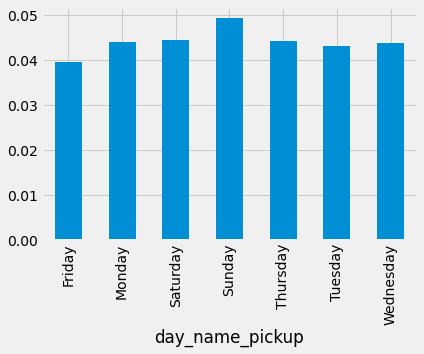

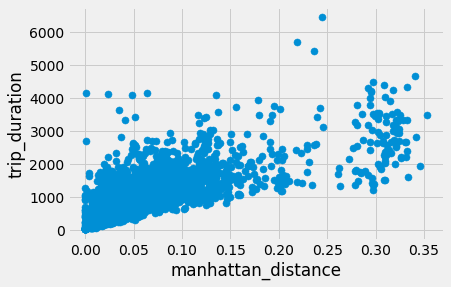

In [39]:
from sklearn.metrics.pairwise import manhattan_distances 

def calculate_distance(x):
    return manhattan_distances( [[x['pickup_latitude'], x['pickup_longitude']]],  [[x['dropoff_latitude'], x['dropoff_longitude']]] )[0][0]

train_data['manhattan_distance'] = train_data.apply(calculate_distance, axis=1)
test_data['manhattan_distance'] = test_data.apply(calculate_distance, axis=1)

train_data.groupby(['day_name_pickup'])['manhattan_distance'].mean().plot(kind='bar')
plt.show()


train_data.round(decimals=3).plot.scatter(x = 'manhattan_distance', y = 'trip_duration', s = 50)
plt.show()

Υποερώτημα 8ο - Υπολογισμός μέσης ταχύτητας και γραφική αναπαράσταση της συσχέτισης μέσης ταχύτητας με ώρα, ημέρα και μήνα 

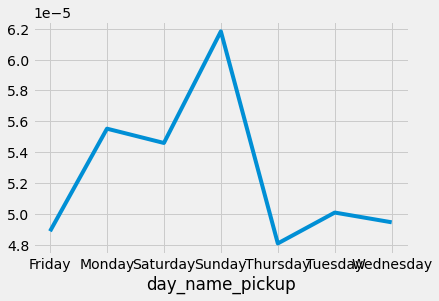

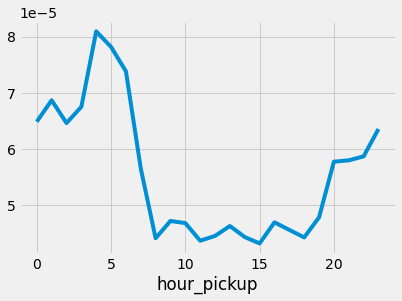

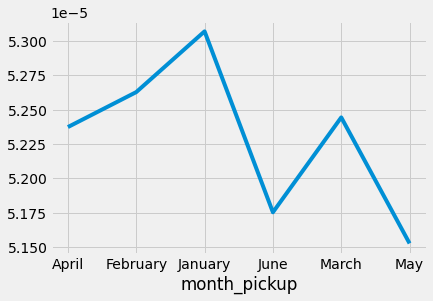

In [34]:
train_data['average_speed'] = train_data['manhattan_distance'] / train_data['trip_duration']

train_data.groupby(['day_name_pickup'])['average_speed'].mean().plot(kind='line')
plt.show()
train_data.groupby(['hour_pickup'])['average_speed'].mean().plot(kind='line')
plt.show()
train_data.groupby(['month_pickup'])['average_speed'].mean().plot(kind='line')
plt.show()

<b>Συμπεράσματα - Παρατηρήσεις: </b><br />
Σχετικά με την Μέση Ταχύτητα, όπως φαίνεται πολύ λογικό, παρατηρούμε ότι επιτυγχάνεται στο χρονικό διάστημα γύρω από τις 5 η ώρα το πρωί. Αντιθέτως, κοντά στις 10 το πρωί επιτυγχάνεται η χαμηλότερη ταχύτητα καθώς υπάρχει η μεγαλύτερη συμφόρηση. Η παρατήρηση φαίνεται λογική, αφού εκείνη την ώρα ο κόσμος κατευθύνεται προς τις δουλειές του.

Υποερώτημα 9ο - Scatter Plots για pickup και dropoff σημεία

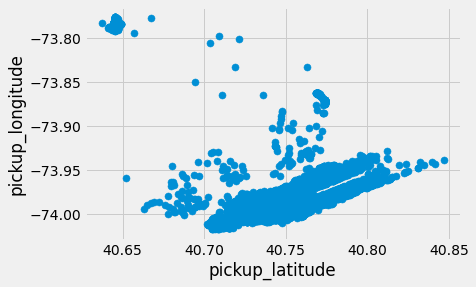

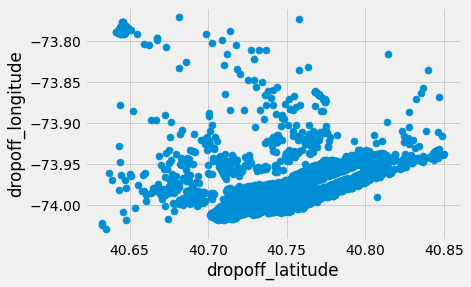

In [35]:
train_data.plot.scatter(x = 'pickup_latitude', y = 'pickup_longitude', s = 50)
plt.show()

train_data.plot.scatter(x = 'dropoff_latitude', y = 'dropoff_longitude', s = 50)
plt.show()

ΜΕΡΟΣ 2 - CLUSTERING - Συσταδοποίηση και πρόβλεψη διάρκειας ταξιδιού

Υποερώτημα 1ο - K-MEANS

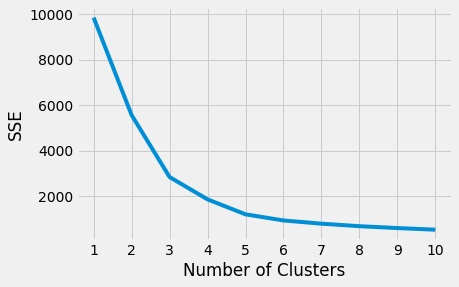

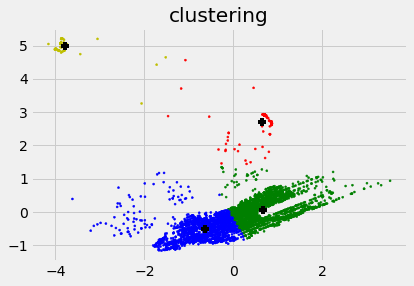

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_data[['pickup_latitude','pickup_longitude']])
scaled_test = scaler.fit_transform(test_data[['pickup_latitude','pickup_longitude']])

#--------------find optimal k for clustering (already done k = 5)----------------------------------

sse = []

for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_train) 
    sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#-------------------------------------------------------------------------------------------------------

kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_train)

x = scaled_train[:, 0]
y = scaled_train[:, 1]

# Cluster = kmeans.labels_
train_data['cluster'] = kmeans.labels_
centers = kmeans.cluster_centers_
centers_x = [i[0] for i in centers]
centers_y = [i[1] for i in centers]

train_data['centers_x'] = train_data.cluster.map({0:centers_x[0], 1:centers_x[1], 2:centers_x[2], 3:centers_x[3]})
train_data['centers_y'] = train_data.cluster.map({0:centers_y[0], 1:centers_y[1], 2:centers_y[2], 3:centers_y[3]})

colors = ['r', 'b', 'g', 'y']
train_data['c'] = train_data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

plt.scatter(x, y, c=train_data.c, s=4)
for i,j in centers:
    plt.scatter(i,j,s=50,c='k',marker='+')
plt.title("clustering")
plt.show()

Υποερώτημα 2ο - Πρόβλεψη Διάρκειας Ταξιδιού με χρήση RandomForestRegressor

prediction:  [2.65484019 2.73322226 2.88755701 ... 3.16256119 2.87136139 3.13996186]


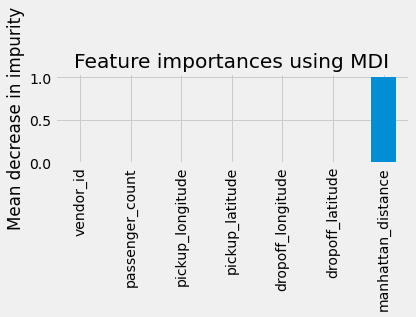

In [40]:
from sklearn.ensemble import RandomForestRegressor

regression_train = train_data[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',   'manhattan_distance']]
regression_test = test_data[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',  'manhattan_distance']]


regr = RandomForestRegressor(max_depth=2,random_state=0)
regr.fit(regression_train,train_data['log_trip_duration'])
print("prediction: ",regr.predict(regression_test))

feature_names = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'manhattan_distance']
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

# feature importance plotting
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

Υποερώτημα 3ο - Εύρεση καλύτερου Συνόλου Παραμέτρων

In [42]:
from sklearn.model_selection import GridSearchCV

#pithanoi parametroi
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

reg = RandomForestRegressor()

grid_search = GridSearchCV(estimator=reg, param_grid=parameters, cv=3,n_jobs = -1, verbose = 2)
grid_search.fit(regression_train,train_data['log_trip_duration'])

print("Tuned Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Tuned Hyperparameters : {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}
Accuracy : 0.6375660835736798


Παρατηρούμε ότι το πιο σημαντικό feature είναι το manhattan distance

Υποερώτημα 4ο - Εκ νέου εκπαίδευση RandomForestRegressor με τις νέες παραμέτρους

In [43]:
#optimal_regressor = RandomForestRegressor(grid_search.best_params_)
optimal_regressor = RandomForestRegressor(bootstrap = True, max_depth = 80, 
                                            max_features = 3, min_samples_leaf = 3, 
                                            min_samples_split = 12, n_estimators = 300)

optimal_regressor.fit(regression_train,train_data['log_trip_duration'])

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=12, n_estimators=300)

Υποερώτημα 5ο - Μέτρηση Απόδοσης με μετρικές MAE, MSE

In [49]:
import sklearn.metrics as metrics

predicted = optimal_regressor.predict(regression_test)
expected = target_data['log_trip_duration']

mae = metrics.mean_absolute_error(expected,predicted)
mse = metrics.mean_squared_error(expected,predicted)
print("Performance Results:")
print("MAE: ",mae)
print("MSE: ",mse)

Performance Results:
MAE:  0.1484957973718208
MSE:  0.045371978305596826
